In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import libraries for  vectorazation
from sklearn.feature_extraction.text import TfidfVectorizer

# import libraries for machine leanring
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix

In [4]:
# read json
df = pd.read_json("recipe_data.json")
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [6]:
# explore df
df.isnull().sum()


id             0
cuisine        0
ingredients    0
dtype: int64

In [10]:
# see if there are duplicate
df.drop_duplicates(subset=['id'])

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [11]:
# count value of cuisine 
df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [16]:
cuisine_list = df['cuisine'].value_counts().index
cuisine_list

Index(['italian', 'mexican', 'southern_us', 'indian', 'chinese', 'french',
       'cajun_creole', 'thai', 'japanese', 'greek', 'spanish', 'korean',
       'vietnamese', 'moroccan', 'british', 'filipino', 'irish', 'jamaican',
       'russian', 'brazilian'],
      dtype='object')

In [31]:
sns.color_palette('Set2',6)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


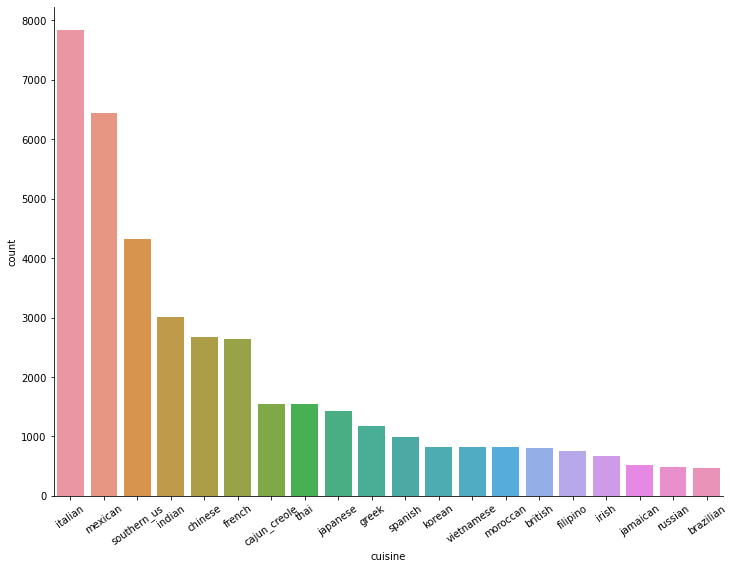

In [36]:
#plot countplot to visualize cuisine distribution,palette choose loop of color

plt.figure(figsize=(12,9))
plt.xticks(rotation=35)
sns.countplot(df['cuisine'],order = cuisine_list)#,palette=sns.color_palette('Set2',2))
# remove the outer line
sns.despine()


In [37]:
# look at first raw of df
df.iloc[0]['ingredients']

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [44]:
# create new column tells how many items there are

df['num_of_ingredients'] = df['ingredients'].apply(len)
df


,id,cuisine,ingredients,num_of_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20
...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",12
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",7
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",12
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",21


In [45]:
df['num_of_ingredients'].describe()

count    39774.000000
mean        10.767713
std          4.428978
min          1.000000
25%          8.000000
50%         10.000000
75%         13.000000
max         65.000000
Name: num_of_ingredients, dtype: float64

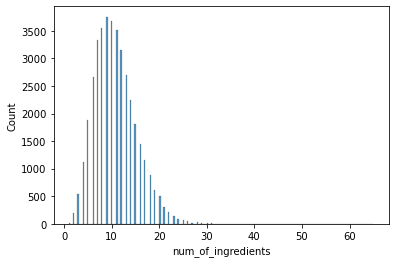

In [48]:
sns.histplot(df['num_of_ingredients'])
plt.show()

In [49]:
# look at large recipes
df[df['num_of_ingredients']>40]

,id,cuisine,ingredients,num_of_ingredients
10513,49282,mexican,"[condensed cream of chicken soup, pepper, refr...",49
15289,3885,italian,"[fettucine, fresh marjoram, minced garlic, oli...",65
22906,2253,indian,"[white vinegar, sparkling lemonade, coconut su...",49
26103,13049,mexican,"[vanilla ice cream, lime, garlic powder, zucch...",52
30350,13430,brazilian,"[marshmallows, fresh corn, cheddar cheese, shr...",59
31250,29216,italian,"[eggs, warm water, pepper, dried basil, unsalt...",43


In [50]:
df.iloc[15289]['ingredients']

['fettucine',
 'fresh marjoram',
 'minced garlic',
 'olive oil',
 'garlic powder',
 'large eggs',
 'Alfredo sauce',
 'vegetable oil',
 'cajun seasoning',
 'shredded romano cheese',
 'basil dried leaves',
 'salt',
 'cayenne pepper',
 'scallions',
 'red bell pepper',
 'boneless skinless chicken breast halves',
 'soba',
 'pasta sauce',
 'kosher salt',
 'milk',
 'fresh ginger',
 'ground black pepper',
 'flour',
 'cooked chicken',
 'coarse salt',
 'lemon',
 'diced tomatoes',
 'garlic',
 'rice vinegar',
 'Neufchâtel',
 'garlic cloves',
 'dried parsley',
 'frozen artichoke hearts',
 'penne',
 'pepper',
 'sweet onion',
 'part-skim mozzarella cheese',
 'parmigiano reggiano cheese',
 'basil leaves',
 'onion powder',
 'red wine vinegar',
 'red pepper flakes',
 'orzo',
 'crushed red pepper',
 'all-purpose flour',
 'freshly ground pepper',
 'sliced mushrooms',
 'panko breadcrumbs',
 'plum tomatoes',
 'fresh basil',
 'fresh leav spinach',
 'water',
 'sun-dried tomatoes',
 'ground pepper',
 'grated p

In [51]:
df

,id,cuisine,ingredients,num_of_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20
...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",12
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",7
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",12
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",21


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cuisine', ylabel='num_of_ingredients'>

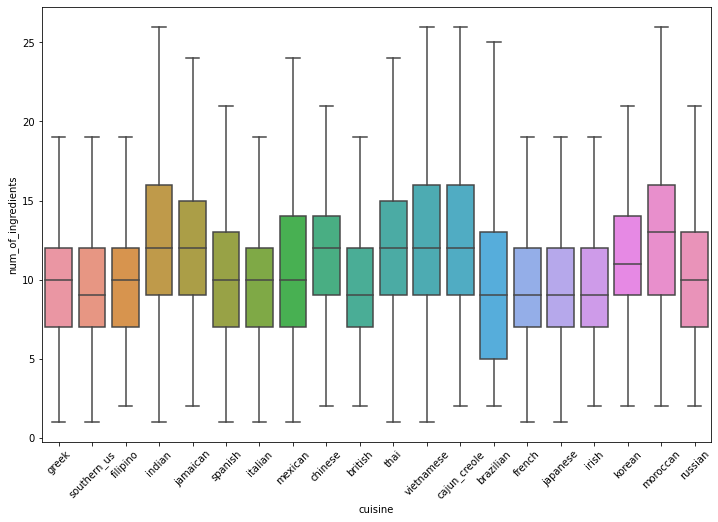

In [59]:
# plot num_of_ingredients vs cuisines
# boxplot will be best
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.boxplot(df['cuisine'],df['num_of_ingredients'],showfliers=False)


In [60]:
df[df['num_of_ingredients']==1]

,id,cuisine,ingredients,num_of_ingredients
940,4734,japanese,[sushi rice],1
2088,7833,vietnamese,[dried rice noodles],1
6787,36818,indian,[plain low-fat yogurt],1
7011,19772,indian,[unsalted butter],1
8181,16116,japanese,[udon],1
8852,29738,thai,[sticky rice],1
8990,41124,indian,[butter],1
10506,32631,mexican,[corn tortillas],1
13178,29570,thai,[grained],1
17804,29849,southern_us,[lemonade concentrate],1


In [61]:
#remove rows with 1
df=df[df['num_of_ingredients']>1]
df

,id,cuisine,ingredients,num_of_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20
...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",12
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",7
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",12
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",21


In [68]:
# new df containing single ingredient per raw
ingredients=[]
cuisines=[]
id_values=[]

for _ ,row in df.iterrows():
    temp_cuisine = row['cuisine']
    temp_id = row['id']
    
    # loop each ingredients in list  in each row
    for ingredient in row['ingredients']:
        id_values.append(temp_id)
        cuisines.append(temp_cuisine)
        ingredients.append(ingredient)
        
df_cuisines_ingredients = pd.DataFrame({'id':id_values,
                                       'cuisines':cuisines,
                                       'ingredients':ingredients})

df_cuisines_ingredients

,id,cuisines,ingredients
0,10259,greek,romaine lettuce
1,10259,greek,black olives
2,10259,greek,grape tomatoes
3,10259,greek,garlic
4,10259,greek,pepper
...,...,...,...
428248,2362,mexican,garlic
428249,2362,mexican,white sugar
428250,2362,mexican,roma tomatoes
428251,2362,mexican,celery


In [70]:
# look distribution of ingredient
df_cuisines_ingredients['ingredients'].value_counts()[:50]

salt                      18049
onions                     7972
olive oil                  7972
water                      7456
garlic                     7380
sugar                      6434
garlic cloves              6237
butter                     4846
ground black pepper        4785
all-purpose flour          4632
pepper                     4438
vegetable oil              4384
eggs                       3388
soy sauce                  3296
kosher salt                3113
green onions               3078
tomatoes                   3058
large eggs                 2948
carrots                    2814
unsalted butter            2779
extra-virgin olive oil     2747
ground cumin               2747
black pepper               2627
milk                       2263
chili powder               2036
oil                        1970
red bell pepper            1939
purple onion               1896
scallions                  1891
grated parmesan cheese     1886
sesame oil                 1773
corn sta

In [74]:
df_cuisines_ingredients[df_cuisines_ingredients['cuisines']=='chinese']['ingredients'].value_counts()

soy sauce           1363
sesame oil           915
salt                 907
corn starch          906
sugar                824
                    ... 
ginseng                1
spaghetti squash       1
fish fingers           1
water spinach          1
meat marinade          1
Name: ingredients, Length: 1792, dtype: int64

In [76]:
# create TF*IDF matrix

ingredient_strings=[]

for ingredient in df['ingredients']:
    ingredient_string = ''.join(ingredient)
    ingredient_strings.append(ingredient_string)
    
df['ingredients_string'] = ingredient_strings
df

<ipython-input-76-b3731f4ebadf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ingredients_string'] = ingredient_strings


,id,cuisine,ingredients,num_of_ingredients,ingredients_string
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,romaine lettuceblack olivesgrape tomatoesgarli...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,plain flourground peppersalttomatoesground bla...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,eggspeppersaltmayonaisecooking oilgreen chilie...
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,watervegetable oilwheatsalt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,black peppershallotscornflourcayenne pepperoni...
...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",12,light brown sugargranulated sugarbutterwarm wa...
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",7,KRAFT Zesty Italian Dressingpurple onionbrocco...
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",12,eggscitrus fruitraisinssourdough starterflourh...
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",21,boneless chicken skinless thighminced garlicst...


In [78]:
# delcare a vectorize object to vectorize string into Tfidf vector
vectorizer = TfidfVectorizer(max_features=100)

# use vectorizer to transform string ingredients column
vectors = vectorizer.fit_transform(df['ingredients_string'])

vectors


<39752x100 sparse matrix of type '<class 'numpy.float64'>'
	with 117465 stored elements in Compressed Sparse Row format>

In [79]:
# turn sparse maxtrix into proper numpy array
vector_array = vectors.toarray()

# get features names from vectorizer
feature_names = vectorizer.get_feature_names()

In [81]:
df_vectors = pd.DataFrame(vector_array,columns = feature_names)
df_vectors

,and,basil,beef,bell,black,bread,breast,brown,cheddar,cheese,...,sugar,tomato,tomatoes,unsalted,vegetable,vinegar,virgin,wheat,white,wine
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.408691,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.386769,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39747,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.577005,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.704083,0.000000,0.0
39748,0.0,0.0,0.0,0.000000,0.338599,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
39749,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
39750,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.284266,0.0


In [83]:
# prepare independent and dependent variables
X=df_vectors
y=df['cuisine']

# split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y)

In [84]:
# train dummyclassfier model

dummy = DummyClassifier()
dummy.fit(X_train,y_train)
dummy_pred = dummy.predict(X_test)

In [87]:
#assess Dumm performance
print(f1_score(y_test,dummy_pred,average='weighted'))

#pd.DataFrame(confusion_matrix(y_test,dummy_pred))


0.06496942633806453


# question

In [94]:
logr = LogisticRegression(max_iter=10000)
logr.fit(X_train,y_train)
logr_pred = logr.predict(X_test)

In [95]:
#assess Dumm performance
print(f1_score(y_test,logr_pred,average='weighted'))

pd.DataFrame(confusion_matrix(y_test,logr_pred))

0.36160949377417173


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,1,1,0,3,2,11,0,15,0,0,0,48,0,0,9,0,3,0
1,0,0,0,1,0,15,2,6,0,32,0,0,0,61,0,0,43,0,1,0
2,0,0,71,5,0,9,1,7,0,89,0,0,0,86,0,0,41,0,0,0
3,0,0,12,304,0,9,0,24,0,50,0,9,16,76,1,0,26,0,7,1
4,0,0,6,29,1,3,0,12,0,17,0,0,1,57,0,0,15,0,4,6
5,0,0,4,2,0,89,5,10,0,215,0,2,0,124,0,0,77,0,1,0
6,0,0,8,0,0,14,25,8,0,121,0,1,0,43,1,0,13,1,0,0
7,1,0,13,18,0,8,2,194,2,80,0,1,1,225,1,0,31,1,22,0
8,0,0,0,0,0,9,2,3,2,28,0,0,0,53,0,0,36,0,0,0
9,0,0,20,7,0,54,19,15,0,1146,0,4,0,189,1,0,111,2,0,0


In [96]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [97]:
f1_score(y_test,rf_pred,average='weighted')

0.3740806741624025